## Chap 10. 스몰데이터 통계 Excercise

## 참고사항 1 - 통계절차
- 통계분석방법 선정
- 분석하고자 하는 목적에 따른 귀무가설(영가설)과 대립가설 설정 
- 분석도구(SPSS,R등) 검정통계량 실행 및 확인
- 유의수준(α) 결정 : 0.1, 0.05, 0.01
- 유의확률(P) 확인
- 유의확률과 유의수준 비교 (< α)
- 귀무가설 과 대립가설 선택
- 분석 결론


> T-TEST(T검정 활용) 

### 참고사항 2
T-Test란?<br> 
- 두 집단의 평균을 비교하는 통계적 검정 방법

P-value<br>
- P < α = 0.05<br>
(오류 5% 이하, 95% 이상 진실)<p>
- P >= α = 0.05<br>
(오류 5% 이상, 95% 이하 진실)

In [1]:
import numpy          # 표본집단을 랜덤값으로 생성하기 위해서 사용
from scipy import stats  # t검정 수행을 위한 패키지 (내장)

#1) 학생 키에 대한 리스트 구성 (랜덤배치)

#height_list = numpy.random.randint(low=162, high=182, size=20)
height_list = numpy.array([169, 167, 175, 166, 162, 180, 172, 162, 173, 162, 181, 175, 181, 181, 162, 165, 172, 176, 167, 165])
height_list

#2) T 테스트 수행

#귀무가설이 참인 경우 학생들의 평균 키는 170cm와 차이가 없다. 그러므로 평균키는 170다.

#귀무가설이 거짓인 경우 학생들의 평균 키는 170cm와 차이가 있다. 그러므로 평균은 170가 아니다.

#대립가설이 참인 경우 - 관측된 p-value가 0.05보다 작은 경우 귀무가설을 기각한다.

tTestResult = stats.ttest_1samp(height_list, 170)
tTestResult

#3)  결과 출력 

#귀무 가설이 맞거나 틀린 것을 증명하려면 어떤 증거가 있어야 한다. 이 증거에 해당하는 숫자를 검정 통계량(test statistics)라고 한다.

print('t검정 통계량 = %.3f, pvalue = %.3f'%(tTestResult))  


#t검정 통계량 = 0.423, pvalue = 0.677

t검정 통계량 = 0.423, pvalue = 0.677


In [3]:
import numpy          # 표본집단을 랜덤값으로 생성하기 위해서 사용
from scipy import stats  # t검정 수행을 위한 패키지 (내장)

#group1Heights = numpy.random.randint(low=157, high=178, size=20)
group1Heights = numpy.array([162, 168, 169, 165, 166, 168, 162, 172, 157, 173, 158, 169, 164, 170, 163, 175, 177, 162, 175, 177])

#group2Heights = numpy.random.randint(low=162, high=182, size=20)
group2Heights = numpy.array([180, 181, 163, 164, 174, 169, 164, 172, 162, 171, 180, 168, 164, 169, 169, 178, 177, 167, 179, 172])

tTestResult= stats.ttest_ind(group1Heights, group2Heights)
tTestResult

#p-value가 0.05보다 작은 경우 귀무가설을 기각하고 대립가설 채택
#Ttest_indResult(statistic=-1.8253194633881713, pvalue=0.07582039848129221)

Ttest_indResult(statistic=-1.8253194633881713, pvalue=0.07582039848129221)

In [4]:
import numpy          # 표본집단을 랜덤값으로 생성하기 위해서 사용
from scipy import stats  # t검정 수행을 위한 패키지 (내장)


# 복용전 몸무게에 대한 랜덤 값 배치
#beforeWeights = numpy.random.randint(low=60, high=90, size=20)
beforeWeights = numpy.array([80, 82, 76, 82, 65, 73, 77, 78, 61, 81, 80, 70, 60, 83, 89, 84, 85, 81, 67, 60])


# 복용 후 몸무게를 가정한 데이터 변조
tmp_list = []
for i in beforeWeights:
    tmp_list.append(i * numpy.random.normal(0.99,0.02)) #random.normal ??
    
afterWeights = numpy.array(tmp_list)
afterWeights


tTestResult= stats.ttest_rel(beforeWeights, afterWeights)
tTestResult

#Ttest_relResult(statistic=3.278149526008354, pvalue=0.003955230626284828)

Ttest_relResult(statistic=2.381679710269089, pvalue=0.027844775777660064)

> 시각화

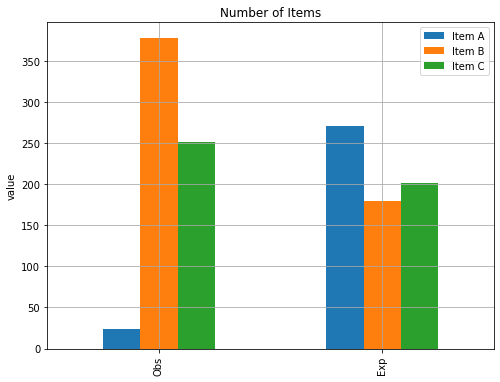

Power_divergenceResult(statistic=454.81159986847393, pvalue=1.7334684263715945e-99)

In [5]:
#연구가설은 대립가설로 하고 진행
from pandas import DataFrame

xo, xe = [24, 378, 251], [271, 180, 202]
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], index=['Obs', 'Exp'])
xc

#bar plot을 작성

import matplotlib.pyplot as plt
%matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()

#from scipy.stats의 chisquare()를 이용하여 카이제곱 검정을 실행

from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

#p-value가 1.7334684263715945e-99로 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지

#즉 연구가설이 지지

## Chap 11. 통계에서 머신러닝으로 Excercise

> 상관분석

In [3]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'C:/Users/victo/anaconda3/python/실습데이터/exam_sample_cor.csv'

#pandas 라이브러리의 read_csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


In [13]:
# font setting
plt.rc("font", family="Malgun Gothic")

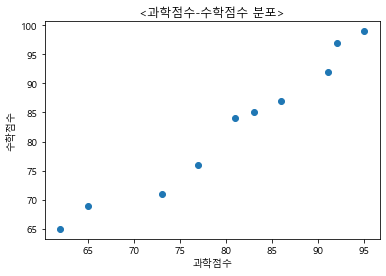

In [16]:
# 두 연속형 변수 스캐터플롯 그리기, 산점도는 연속형 변수(x, y)에 유용함
plt.title("<과학점수-수학점수 분포>")
plt.xlabel("과학점수")
plt.ylabel("수학점수")
plt.scatter(df.science, df.math)

In [17]:
# 상관계수 확인
# 상관계수 - 연속형의 경우 pearson법을 활용, 범주형은 spearman
corr = df.corr() #(method = 'pearson')
corr

,student_no,science,english,math
student_no,1.000000,0.334156,0.180978,0.264716
science,0.334156,1.000000,0.976411,0.982180
english,0.180978,0.976411,1.000000,0.984986
math,0.264716,0.982180,0.984986,1.000000


> 상관 시각화

<AxesSubplot:>

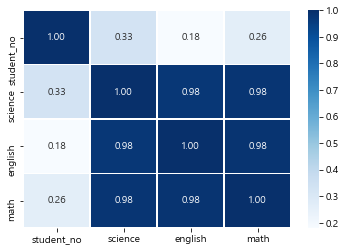

In [21]:
# 히트맵으로 상관도 시각화
sns.heatmap(data = df.corr() , annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<ipython-input-19-5fc1982eca6c>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1, dtype=np.bool)
C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

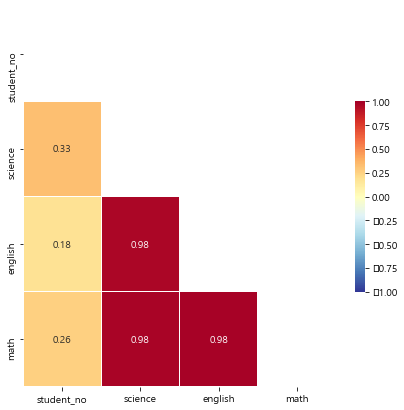

In [19]:
df1 = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1 )  # 컬러바 범위 -1 ~ 1

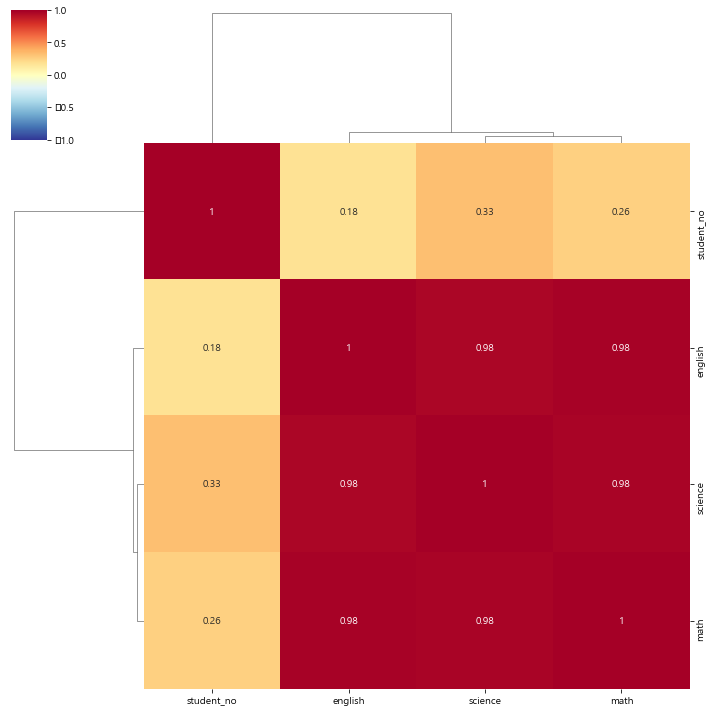

In [22]:
df1 = df.corr()
sns.clustermap(df1, annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

> 단순 선형회귀

In [23]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'C:/Rtest/exam_sample_cor.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


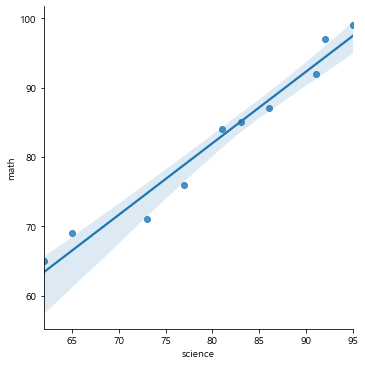

In [26]:
# sns의 lmplot활용(lm은 linear model)
sns.lmplot(x='science', y='math',data=df)

In [27]:
# 회귀분석을 위해 종속(Y=수학), 독립(X=과학)
# 과학점수를 알면 수학점수를 예상 할 수 있다. 
# 단순선형회귀 모형 
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("math ~ science", df).fit()  #종속 ~ 독립 변수 순서
lin_reg.summary()

C:\Users\green\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sun, 22 May 2022   Prob (F-statistic):           4.32e-07
Time:                        19:20:32   Log-Likelihood:                -21.673
No. Observations:                  10   AIC:                             47.35
Df Residuals:                       8   BIC:                             47.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7527      5.682     -0.132      0.898     -13.855      12.349
science        1.0342      0.070     14.781      0.000       0.873       1.196
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.811
Skew:                          -0.402   Prob(JB):                        0.667
Kurtosis:                       1.859   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 로지스틱(Logistic) 회귀 - 두가지의 값만 갖는 경우

C:\Users\green\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


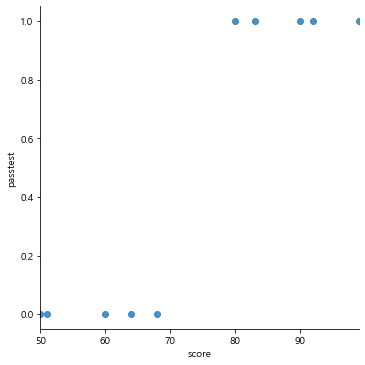

In [30]:
import pandas as pd           #판다스
import seaborn as sns          #시본 
import numpy as np           #넘파이

# DataFrame 생성
passtest = [0,0,0,0,0,1,1,1,1,1]
score = [51, 64, 60, 50, 68, 80, 90, 92, 99,83]
df = pd.DataFrame({"passtest": passtest, "score": score, } )
df.head()

#상관분석
sns.lmplot(x='score', y='passtest',data=df, logistic=True)  #lmplot은 선형회귀

C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


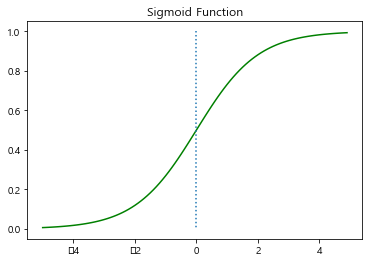

In [31]:
#  a는 1, b는 0임을 가정한 그래프입니다.
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


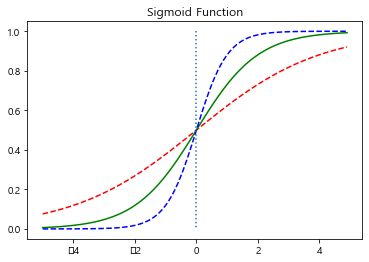

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)  #시그모이드 함수가 뭐지?
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\green\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


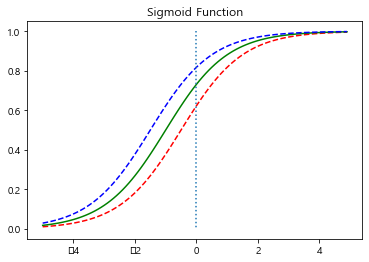

In [33]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()